### Importação das bibliotecas necessárias

In [215]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,  GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from itertools import combinations
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier

Leitura dos dataframes

In [216]:
df_treino = pd.read_csv('data/train.csv')
df_teste = pd.read_csv('data/test.csv')

### 2. Exploração e Visualização dos Dados (até 2,0 pts):

In [217]:
df_treino.head(10)

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0
5,81987,6m1TWFMeon7ai9XLOzdbiR,BTS,Love Yourself 轉 'Tear',FAKE LOVE,242333,False,0.557,0.7190,2,...,0,0.0371,0.002670,0.000000,0.3060,0.3450,77.502,4,pop,1
6,861,2hVaNGGvdvvzRPCK9BUZmA,Rosie Thomas;The Shins;Sufjan Stevens;Josh Ottum,Always Be My Baby,Always Be My Baby,254306,False,0.516,0.3110,1,...,1,0.0306,0.936000,0.000281,0.1070,0.5580,129.958,4,acoustic,1
7,105691,4XnOAcX5K9XojJC5o0MlqT,"Sarah, the Illstrumentalist",No Traffic in LA,Finally Out,130634,False,0.725,0.6320,6,...,0,0.0358,0.103000,0.951000,0.0847,0.3120,122.983,4,study,0
8,105515,0wwa9lg3yCKyyOkJLAEtod,Waveum,In The Third Move,Limewire,79764,False,0.830,0.2610,11,...,1,0.1000,0.638000,0.934000,0.1140,0.3410,85.009,4,study,0
9,110527,2spyaDFRS112FVYq9UZ6Xu,Dj T.H.;Mitraz,Chasing Stars,Chasing Stars - Extended Mix,354375,False,0.669,0.9180,0,...,0,0.0470,0.000981,0.026100,0.5210,0.3700,129.984,4,trance,0


In [218]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

In [219]:
df_treino.shape

(79800, 21)

In [220]:
df_treino.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,57140.494048,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,32993.196225,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28450.500000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,57234.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,85774.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,113998.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


In [221]:
df_treino.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   track_id     79800 non-null  object
 1   artists      79800 non-null  object
 2   album_name   79800 non-null  object
 3   track_name   79800 non-null  object
 4   track_genre  79800 non-null  object
dtypes: object(5)
memory usage: 3.0+ MB


In [222]:
df_treino.select_dtypes(include='object').describe()

,track_id,artists,album_name,track_name,track_genre
count,79800,79800,79800,79800,79800
unique,66720,25775,37315,55767,114
top,5ftfVzSLIi5ZxYdNbRtf41,The Beatles,Alternative Christmas 2022,Run Rudolph Run,progressive-house
freq,7,194,131,115,738


In [223]:
df_treino.select_dtypes(include='bool').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   explicit  79800 non-null  bool 
dtypes: bool(1)
memory usage: 78.1 KB


In [224]:
df_treino.select_dtypes(include='bool').describe()

,explicit
count,79800
unique,2
top,False
freq,72962


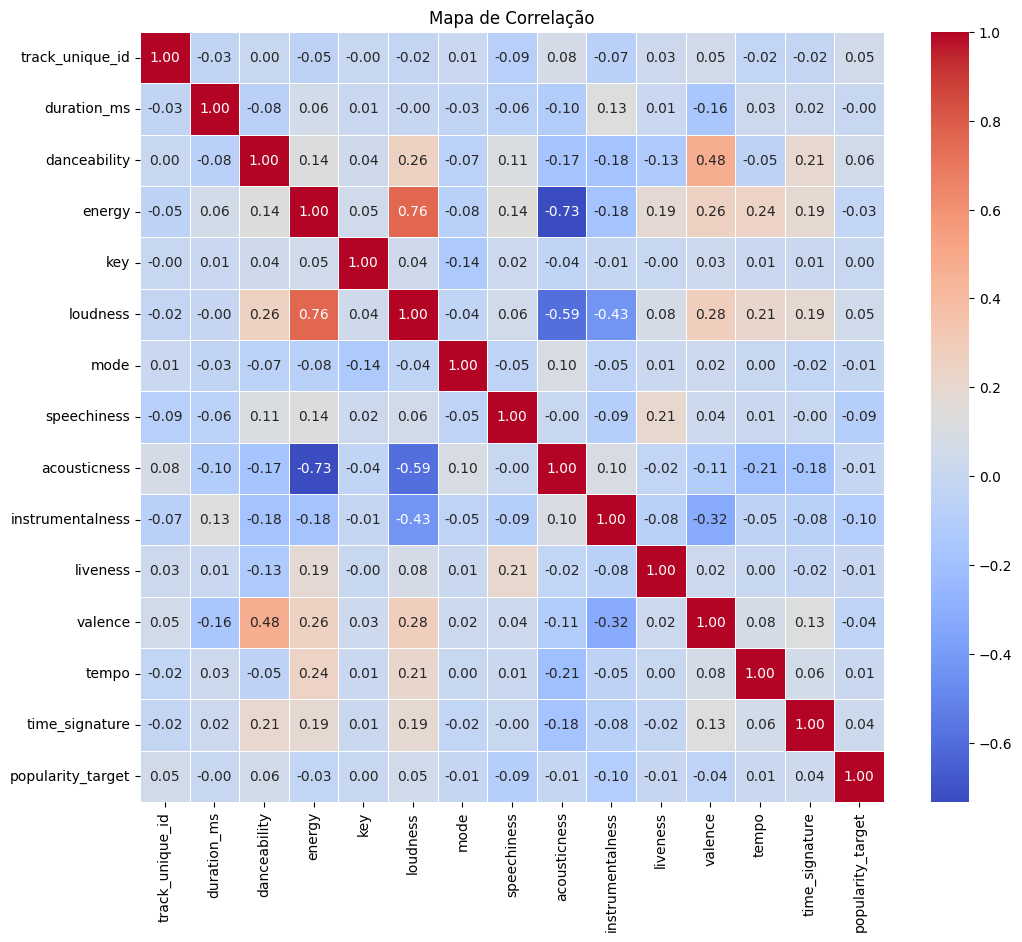

In [225]:
numeric_cols = df_treino.select_dtypes(include=[np.number])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlação')
plt.show()

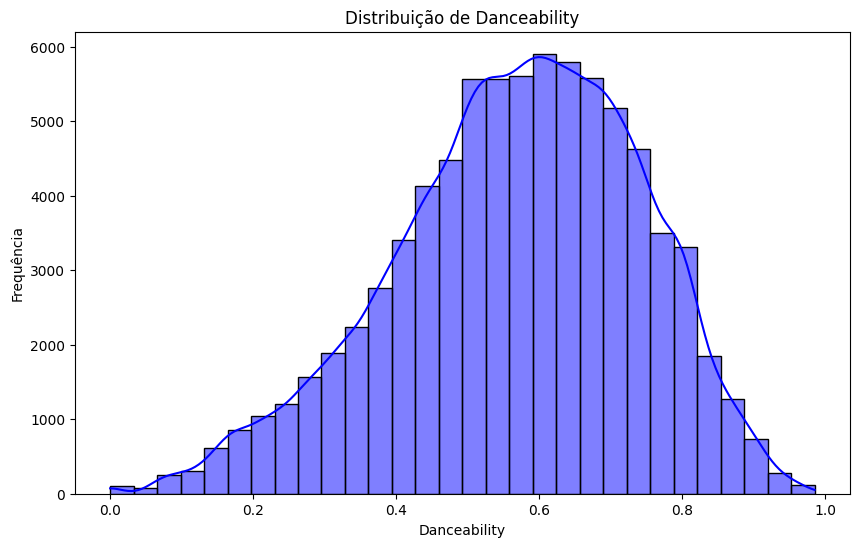

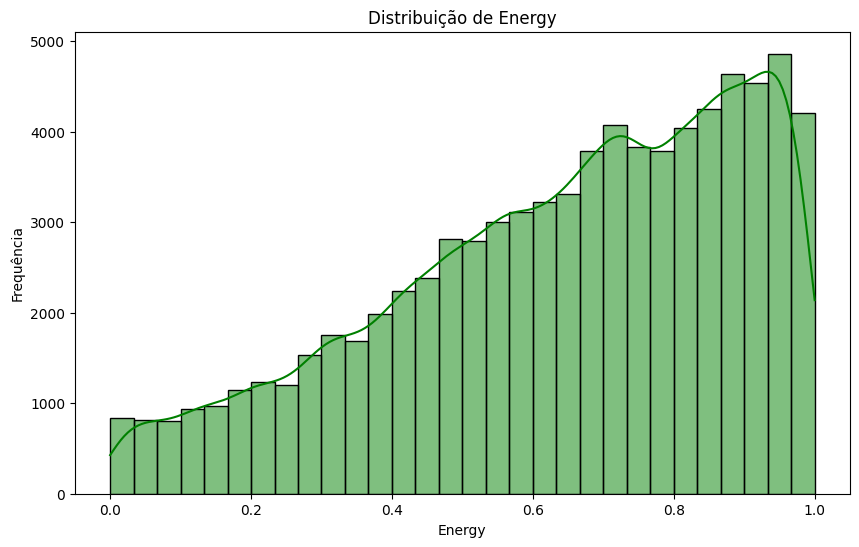

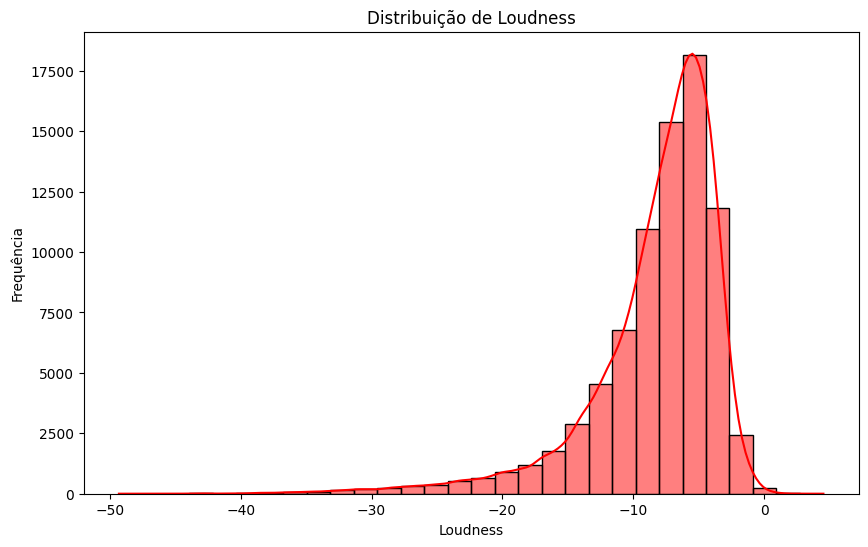

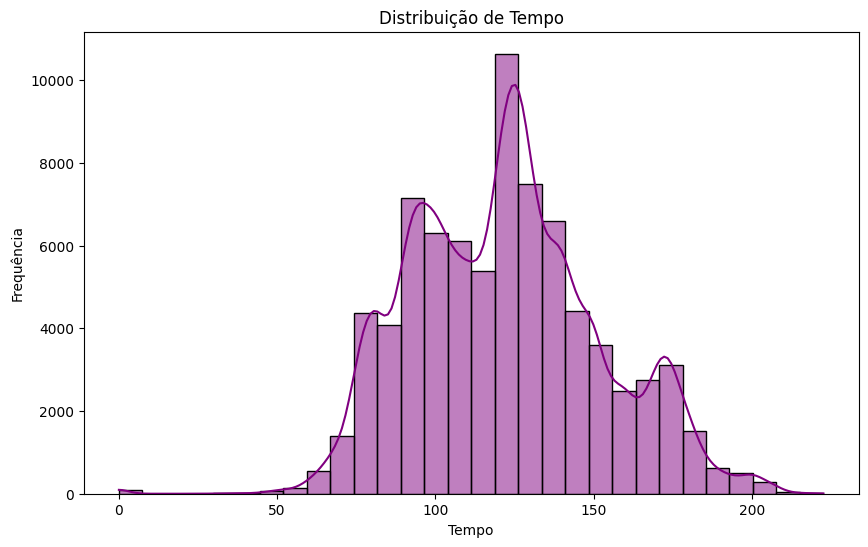

In [226]:
plt.figure(figsize=(10, 6))
sns.histplot(df_treino['danceability'], kde=True, bins=30, color='blue')
plt.title('Distribuição de Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_treino['energy'], kde=True, bins=30, color='green')
plt.title('Distribuição de Energy')
plt.xlabel('Energy')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_treino['loudness'], kde=True, bins=30, color='red')
plt.title('Distribuição de Loudness')
plt.xlabel('Loudness')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_treino['tempo'], kde=True, bins=30, color='purple')
plt.title('Distribuição de Tempo')
plt.xlabel('Tempo')
plt.ylabel('Frequência')
plt.show()

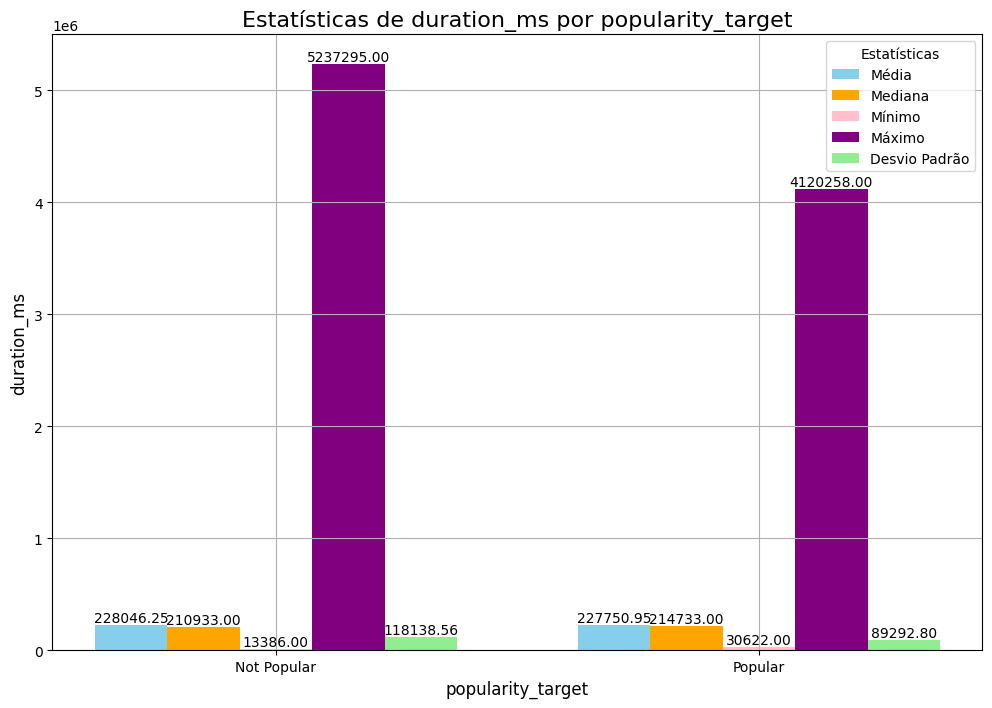

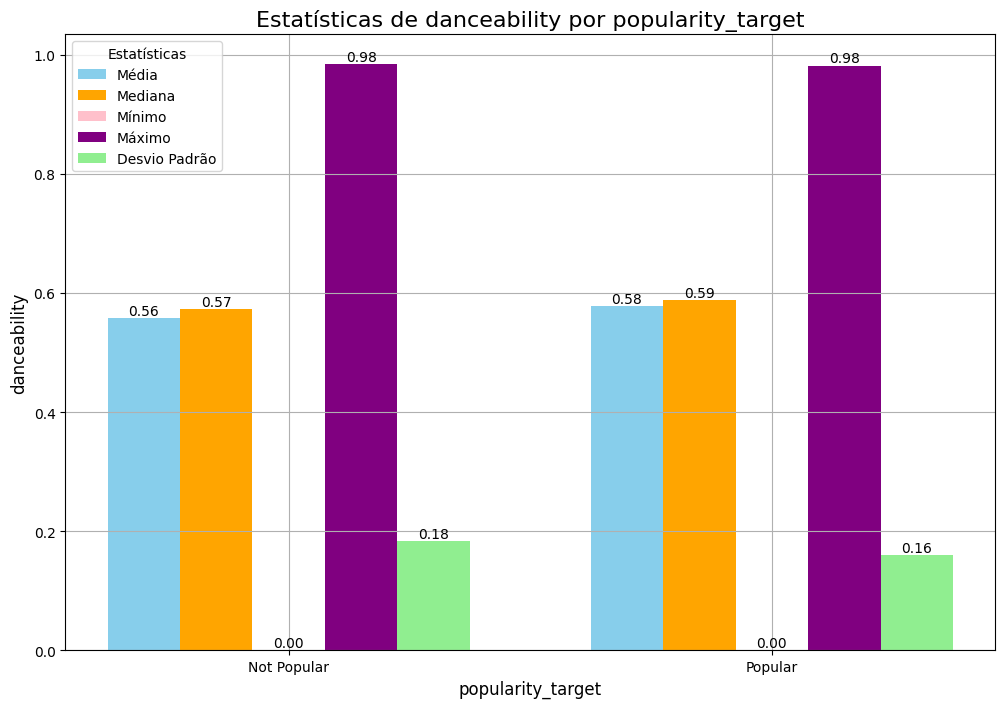

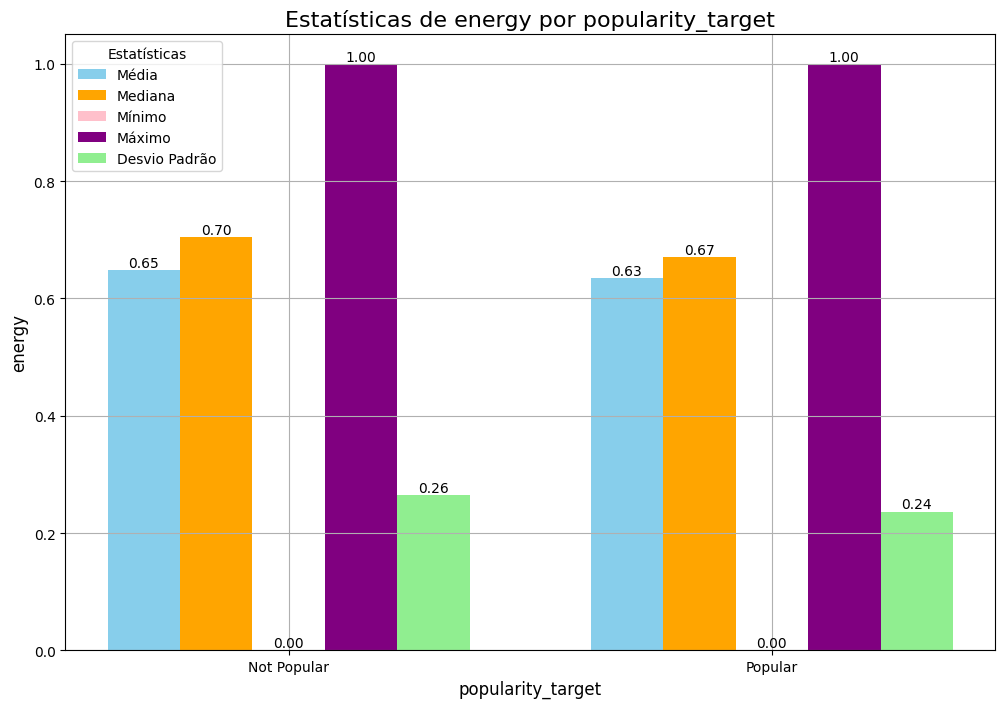

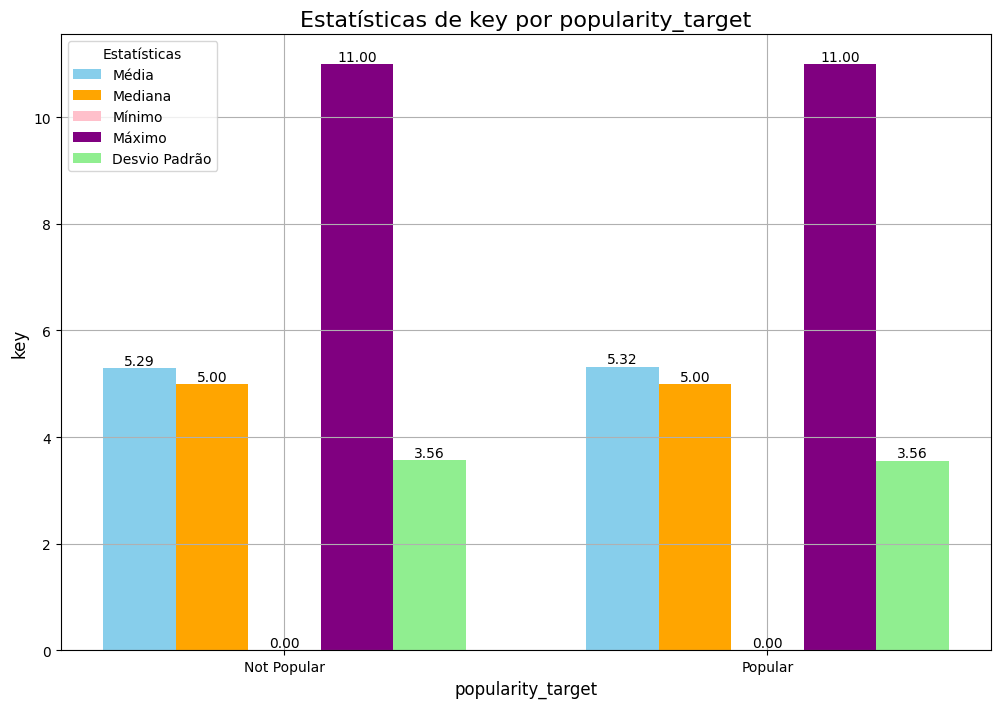

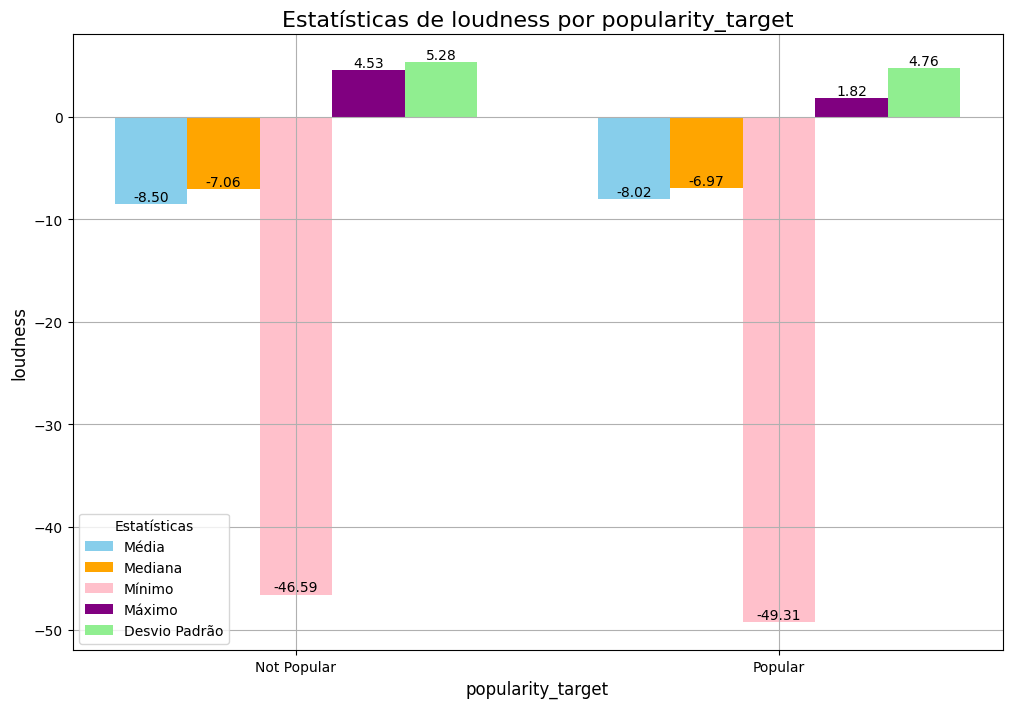

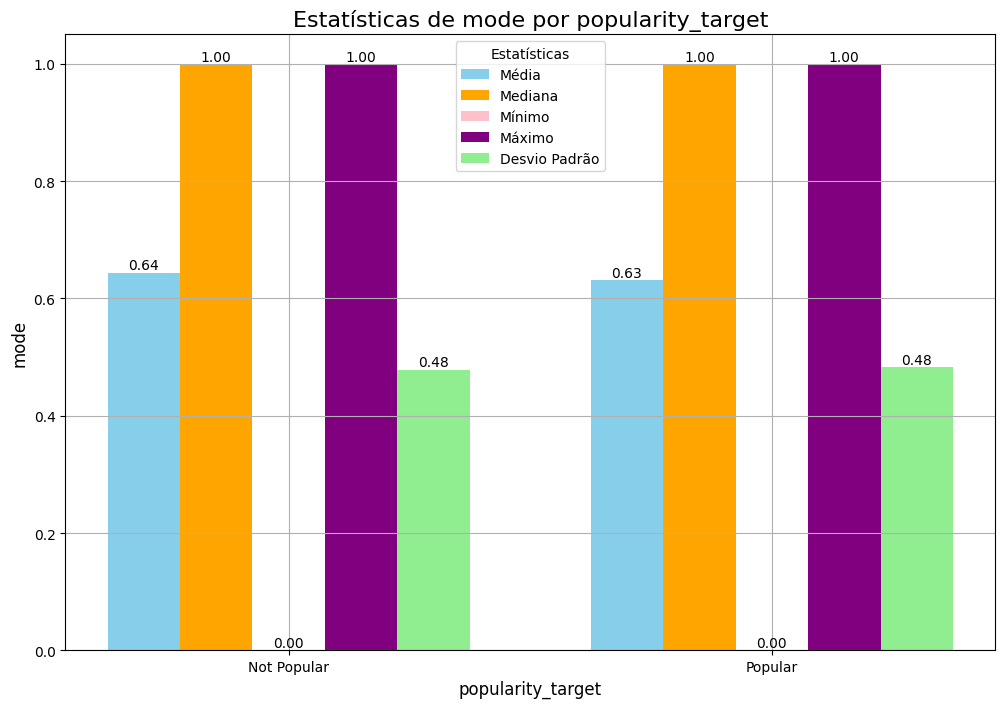

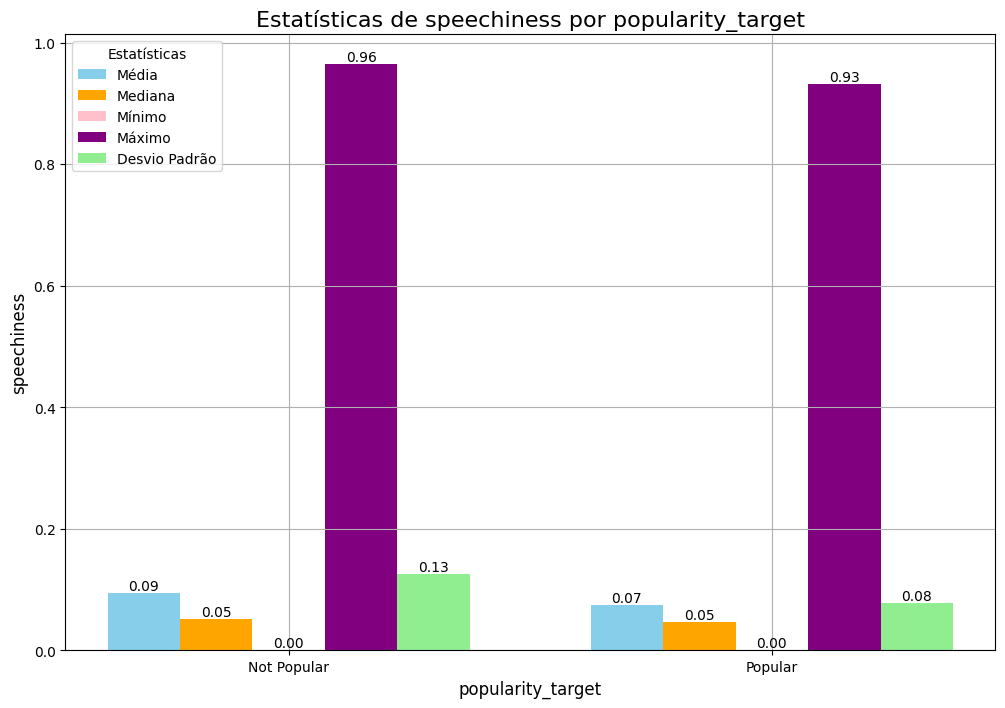

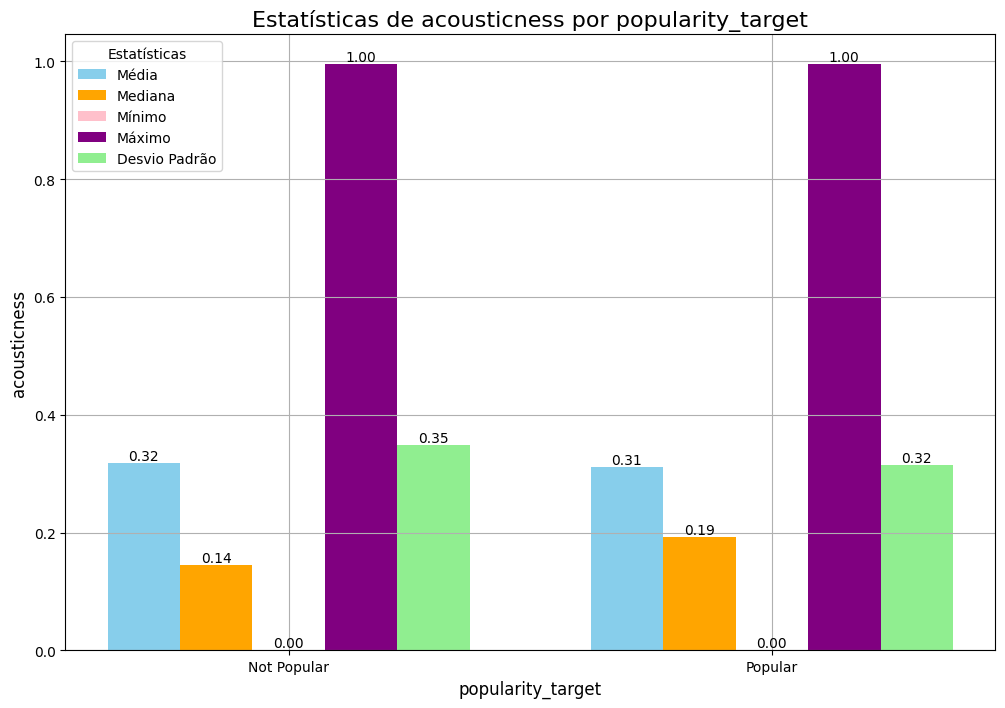

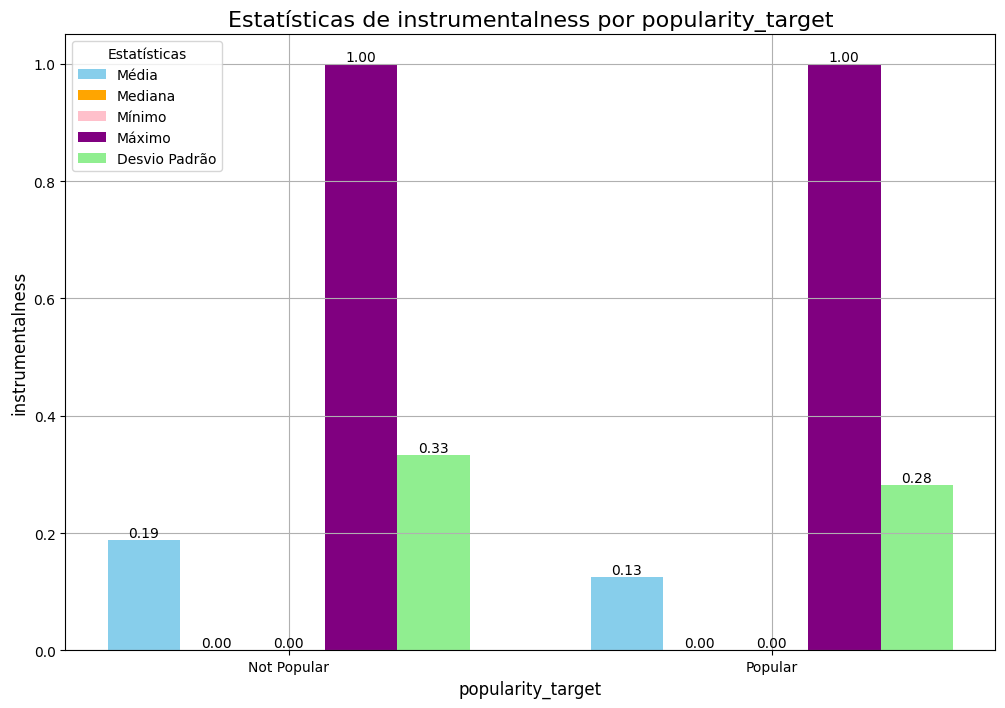

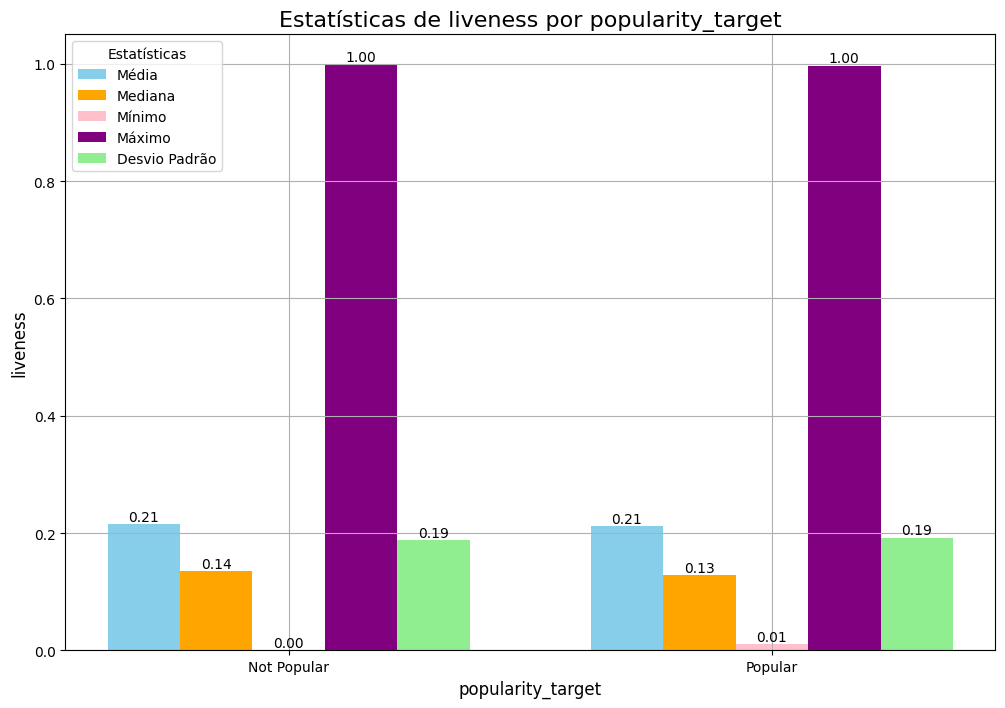

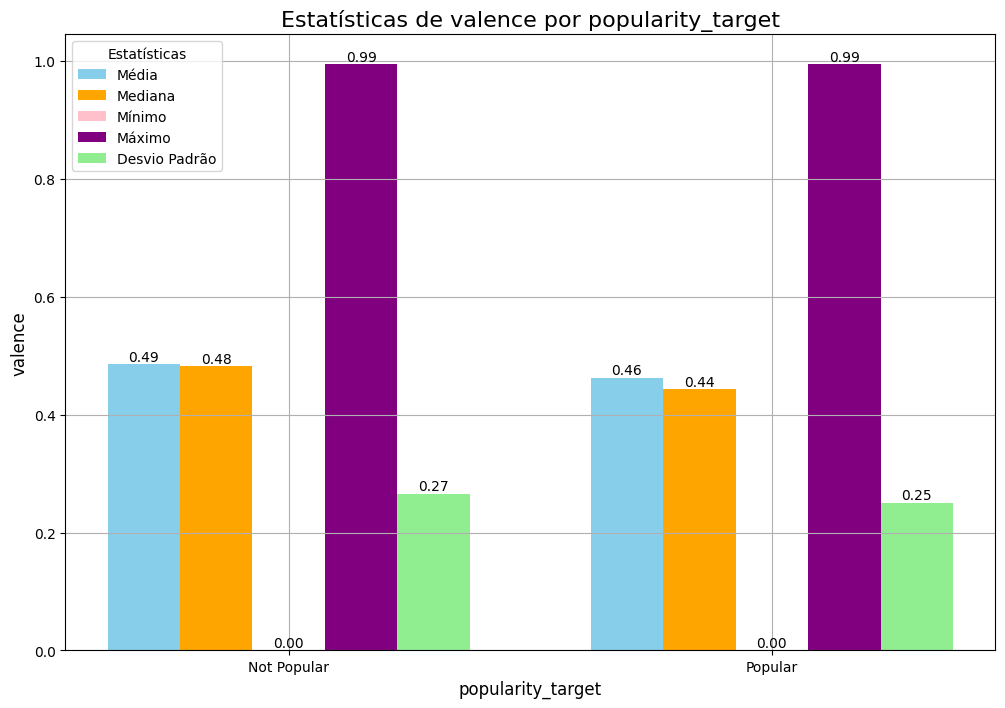

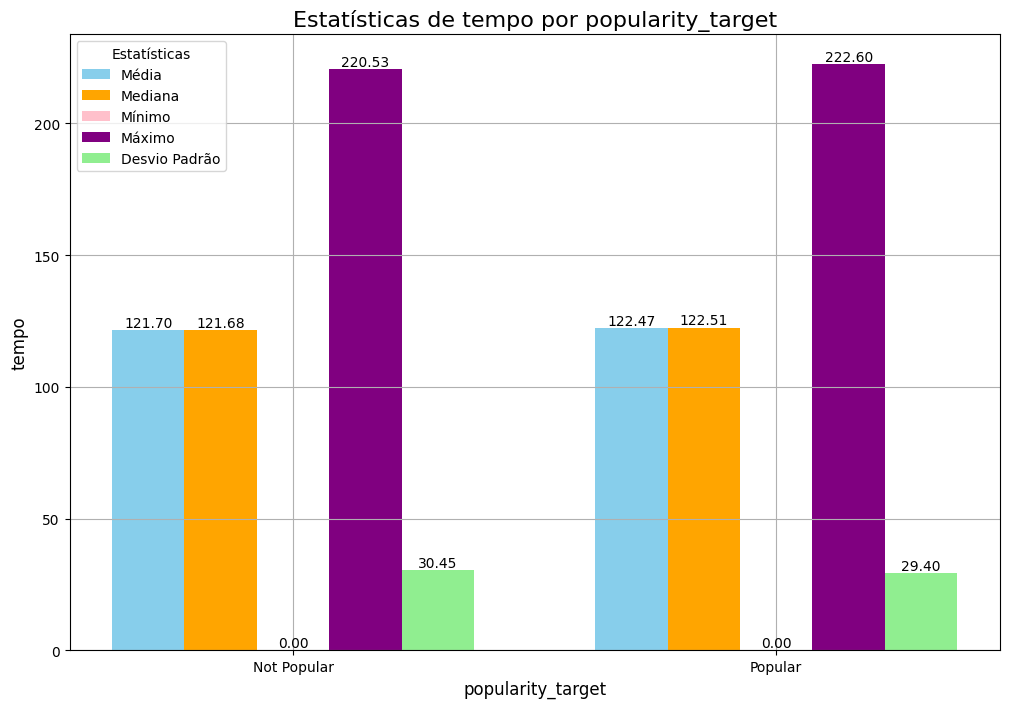

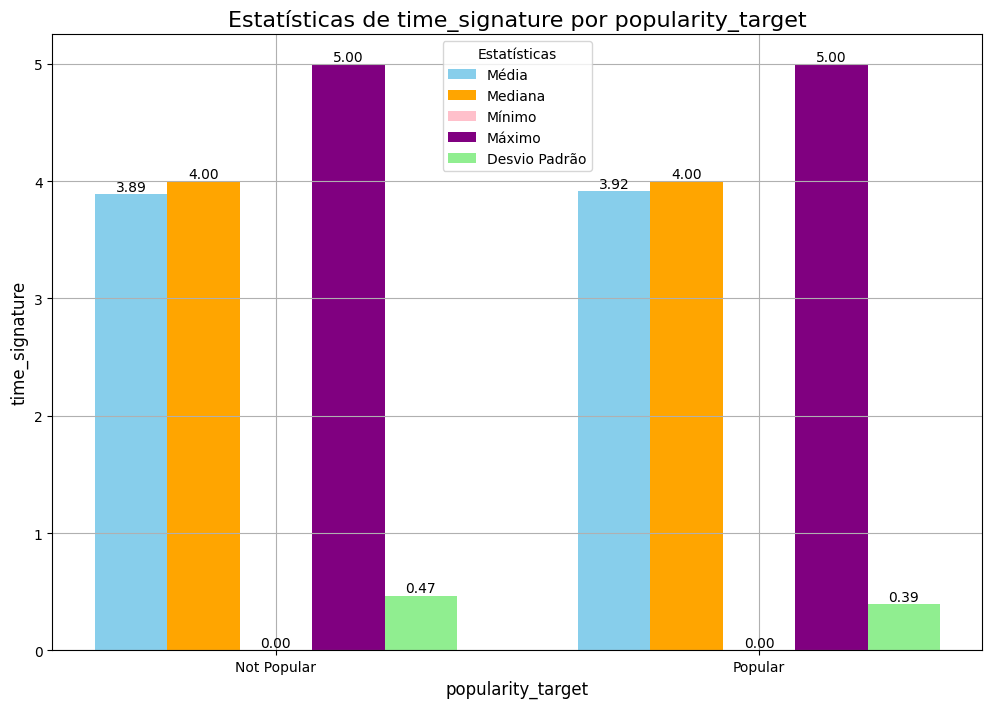

In [227]:
def plot_stats_features_vs_target(df, target_column):
    numeric_columns = df.select_dtypes(include=['int', 'float']).columns
    numeric_columns = numeric_columns.drop(['track_unique_id', target_column], errors='ignore')
    
    for column in numeric_columns:
        plt.figure(figsize=(12, 8))
        
        stats = df.groupby(target_column)[column].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
        
        bar_width = 0.15
        indices = np.arange(len(stats))
        
        bars_mean = plt.bar(indices - 2*bar_width, stats['mean'], width=bar_width, label='Média', color='skyblue')
        bars_median = plt.bar(indices - bar_width, stats['median'], width=bar_width, label='Mediana', color='orange')
        bars_min = plt.bar(indices, stats['min'], width=bar_width, label='Mínimo', color='pink')
        bars_max = plt.bar(indices + bar_width, stats['max'], width=bar_width, label='Máximo', color='purple')
        bars_std = plt.bar(indices + 2*bar_width, stats['std'], width=bar_width, label='Desvio Padrão', color='lightgreen')
        
        for bars in [bars_mean, bars_median, bars_min, bars_max, bars_std]:
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)
        
        plt.title(f'Estatísticas de {column} por {target_column}', fontsize=16)
        plt.xlabel(target_column, fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.xticks(indices, ['Not Popular', 'Popular'])
        plt.legend(title='Estatísticas')
        plt.grid(True)
        
        plt.show()

plot_stats_features_vs_target(df_treino, 'popularity_target')


<Figure size 1200x600 with 0 Axes>

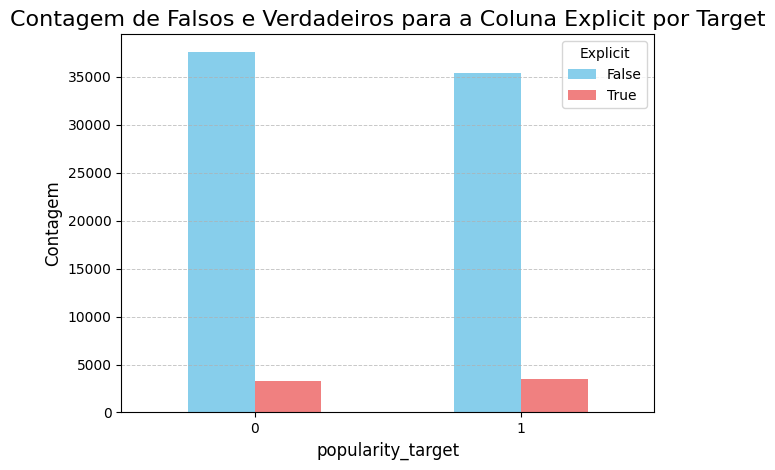

<Figure size 1200x600 with 0 Axes>

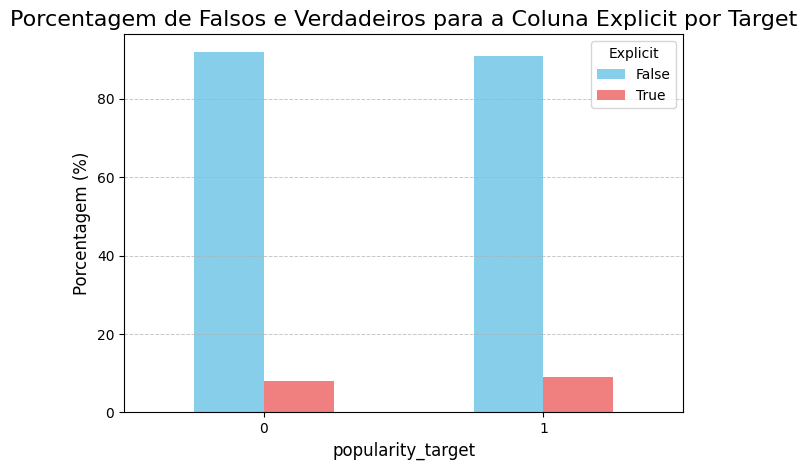

In [228]:
def plot_explicit_counts_by_target(df, target_column):
    explicit_counts = df.groupby(target_column)['explicit'].value_counts().unstack(fill_value=0)
    
    plt.figure(figsize=(12, 6))
    explicit_counts.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])
    
    plt.title('Contagem de Falsos e Verdadeiros para a Coluna Explicit por Target', fontsize=16)
    plt.xlabel(target_column, fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Explicit', labels=['False', 'True'])
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    explicit_percentage = explicit_counts.div(explicit_counts.sum(axis=1), axis=0) * 100
    
    plt.figure(figsize=(12, 6))
    explicit_percentage.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'])
    
    plt.title('Porcentagem de Falsos e Verdadeiros para a Coluna Explicit por Target', fontsize=16)
    plt.xlabel(target_column, fontsize=12)
    plt.ylabel('Porcentagem (%)', fontsize=12)
    plt.xticks(rotation=0)
    plt.legend(title='Explicit', labels=['False', 'True'])
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_explicit_counts_by_target(df_treino, 'popularity_target')

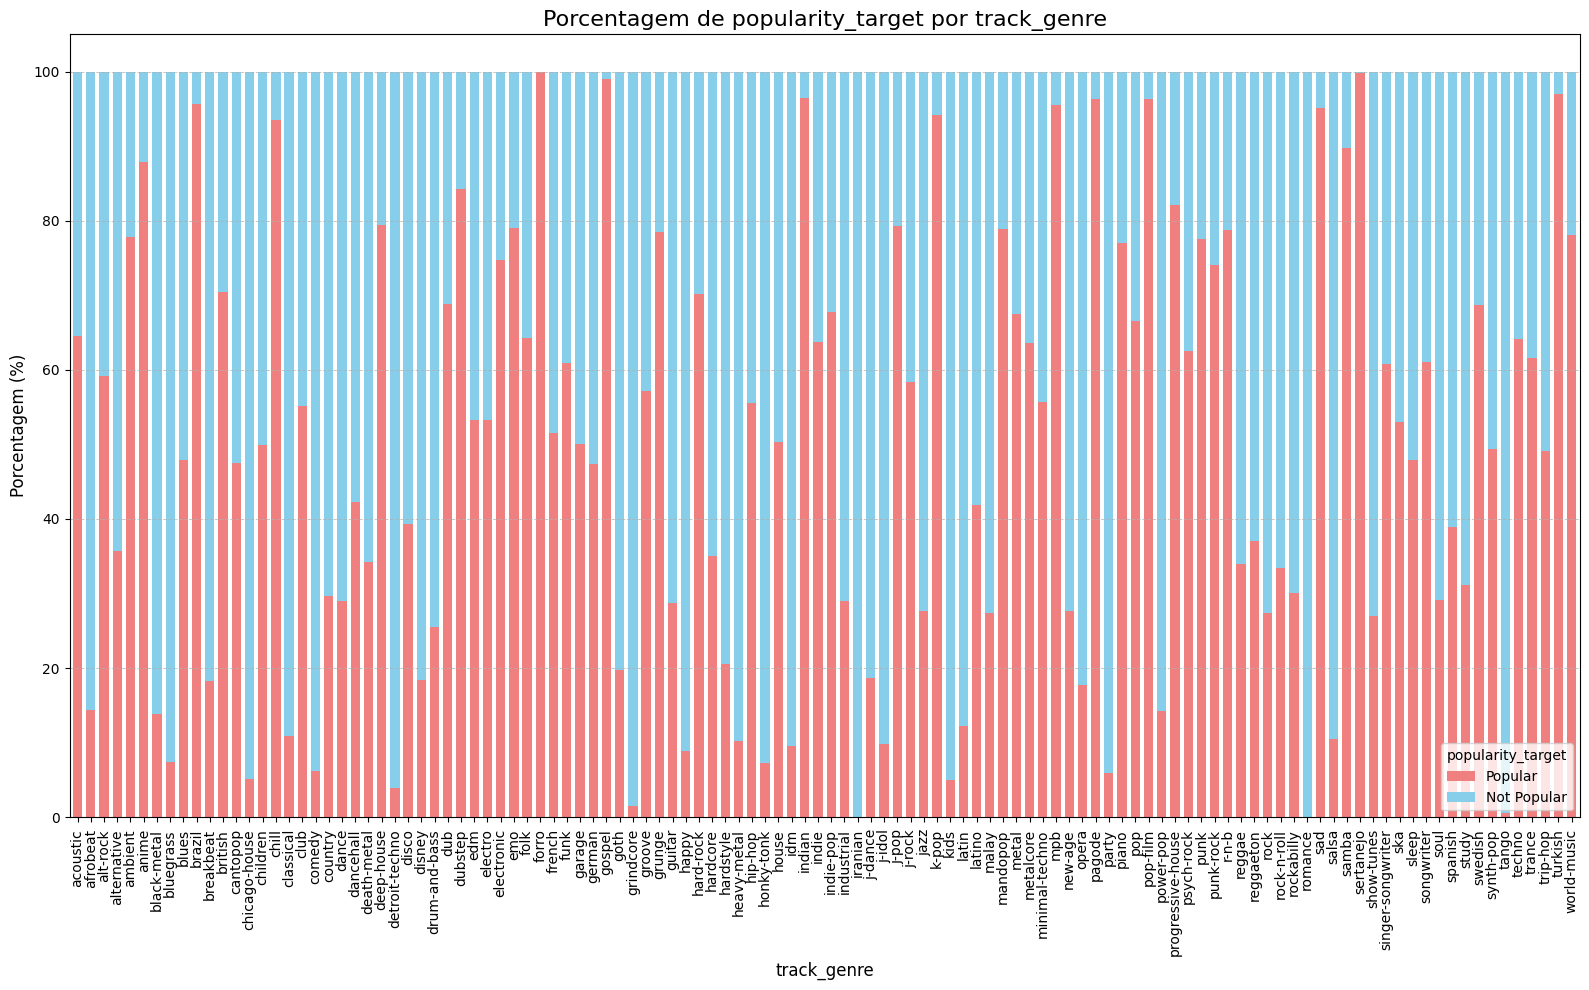

In [229]:
def plot_genre_vs_target_percentage(df, target_column, genre_column):
    genre_counts = df.groupby([genre_column, target_column]).size().unstack(fill_value=0)
    
    genre_percentage = genre_counts.div(genre_counts.sum(axis=1), axis=0) * 100
    
    genre_percentage = genre_percentage[[1, 0]]
    
    fig, ax = plt.subplots(figsize=(16, 10))
    
    genre_percentage.plot(kind='bar', stacked=True, ax=ax, color=['lightcoral', 'skyblue'], width=0.7)
    
    plt.title(f'Porcentagem de {target_column} por {genre_column}', fontsize=16)
    plt.xlabel(genre_column, fontsize=12)
    plt.ylabel('Porcentagem (%)', fontsize=12)
    
    plt.xticks(ticks=range(len(genre_percentage)), labels=genre_percentage.index, fontsize=10)
    ax.xaxis.set_tick_params(pad=5)
    
    plt.legend(title=target_column, labels=['Popular', 'Not Popular'])
    plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    
    plt.tight_layout()
    plt.show()

plot_genre_vs_target_percentage(df_treino, 'popularity_target', 'track_genre')

plotando os gráficos para comparar os genêros forro, sertanejo, romance e iranian, pois se olharmos no gráfico anterior podemos perceber que são os gêneros respectivamente com 100%, 100%, 0% e 0% de popularidade.

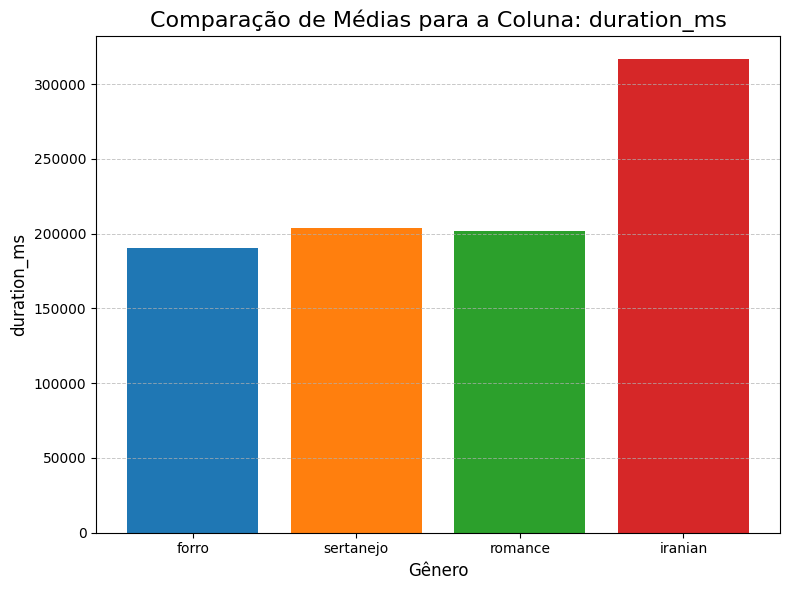

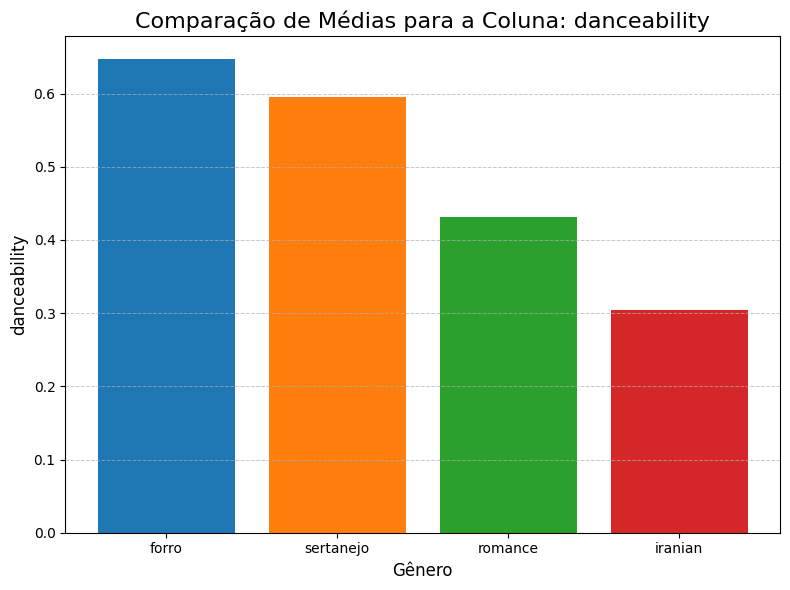

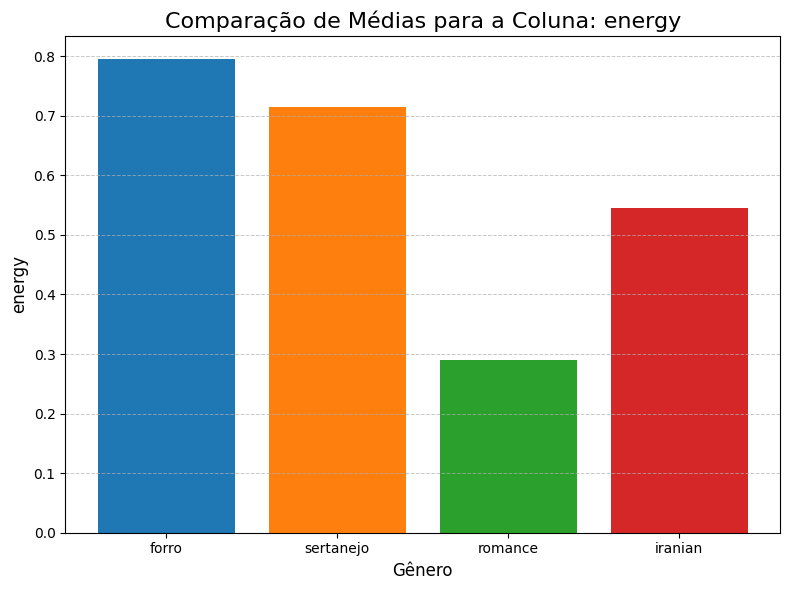

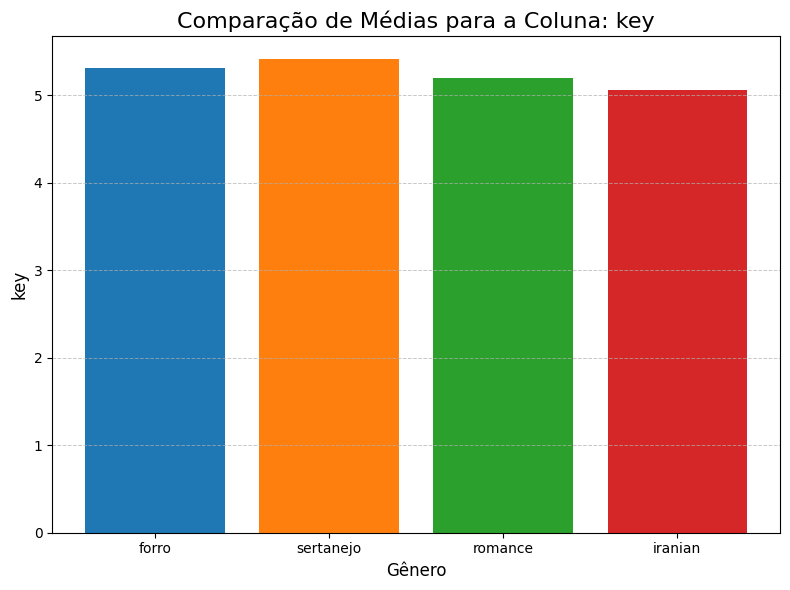

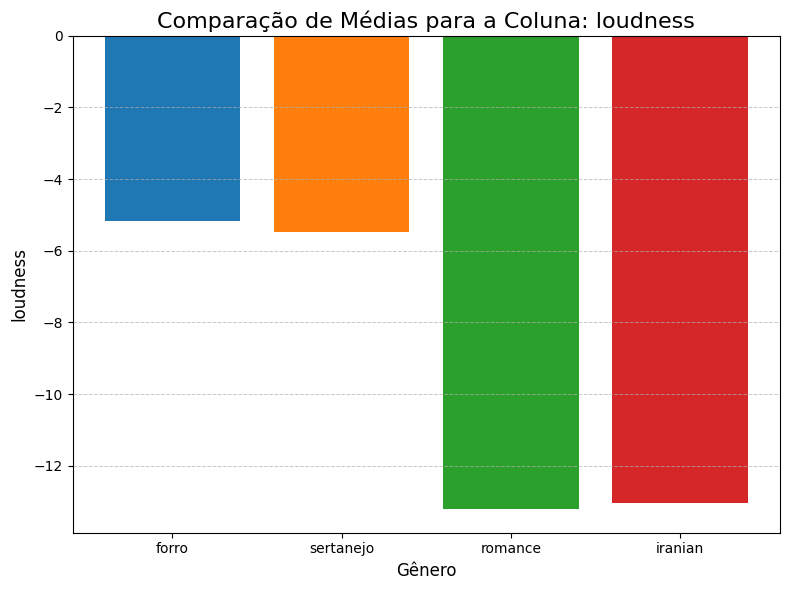

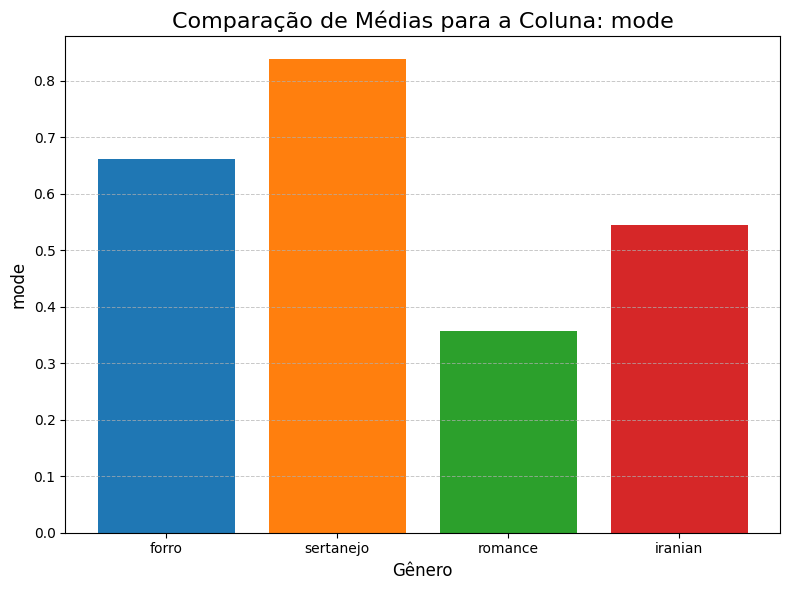

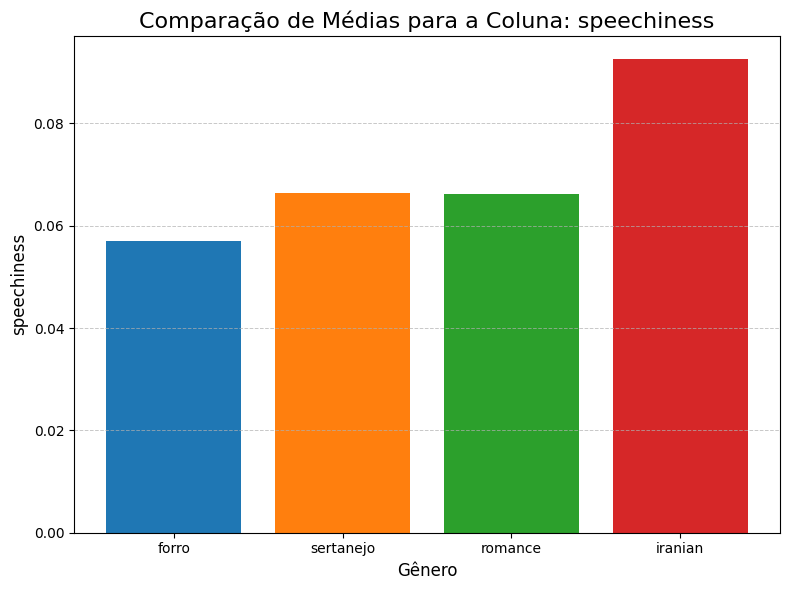

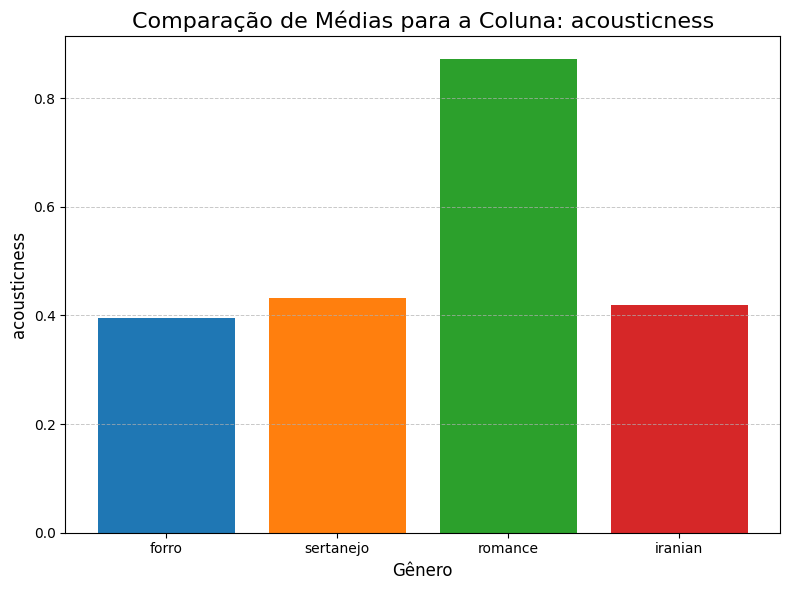

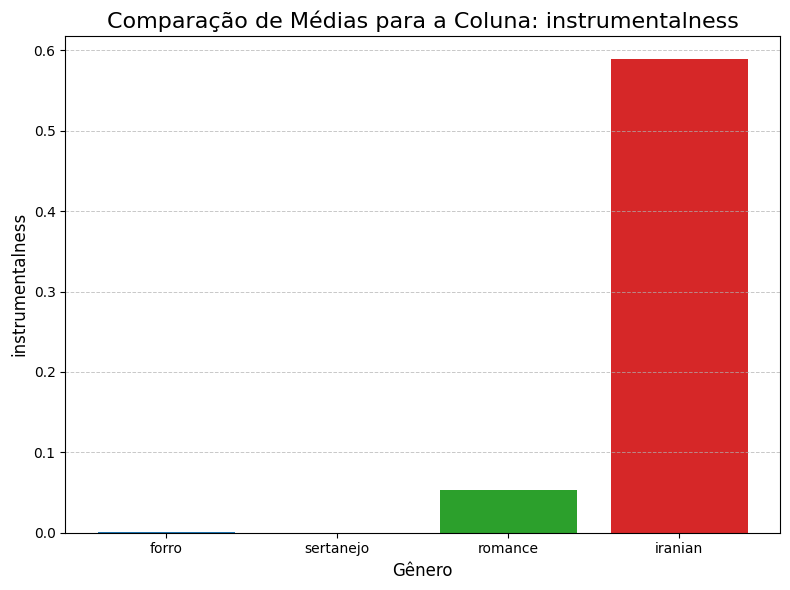

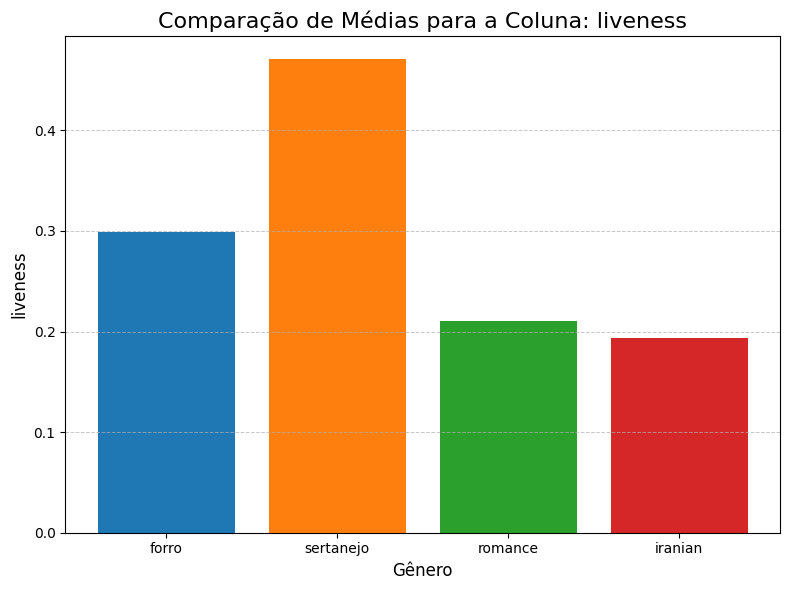

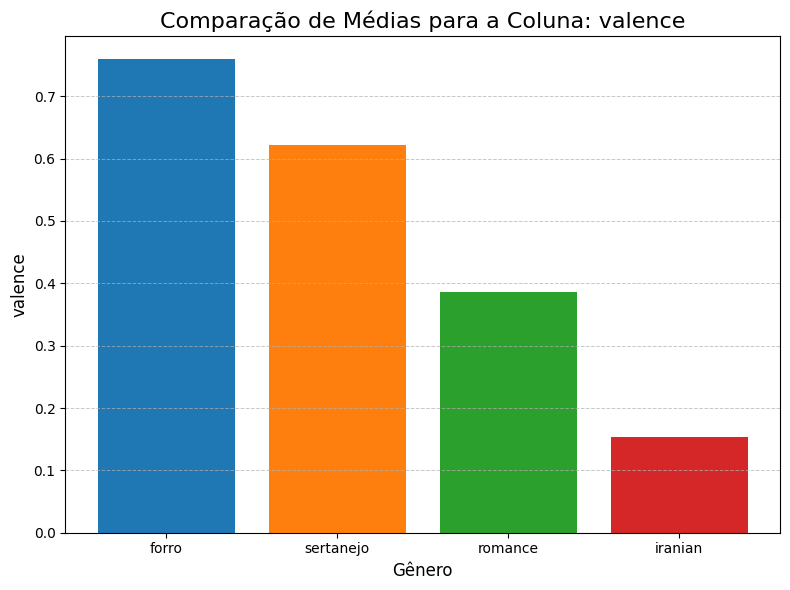

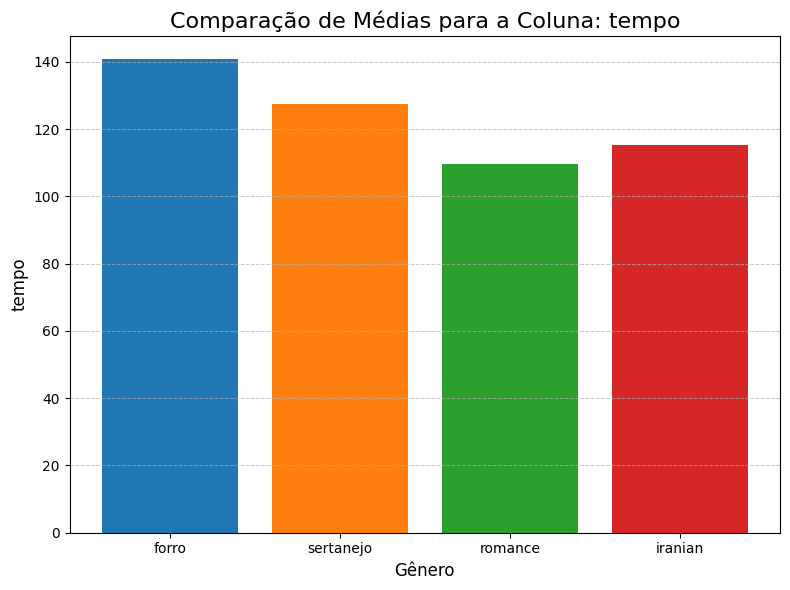

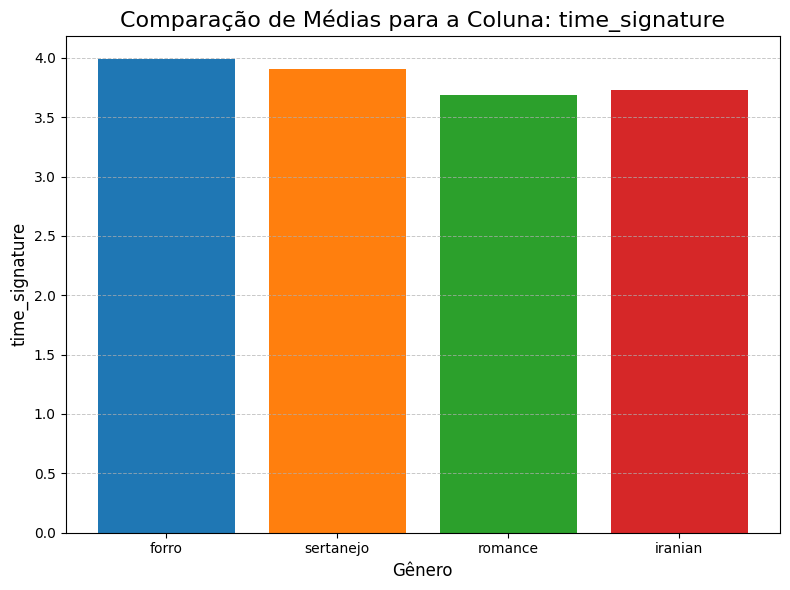

In [230]:
def plot_genre_features_comparison(df, genres):
    
    df_filtered = df[df['track_genre'].isin(genres)]
    
    numeric_columns = df_filtered.select_dtypes(include=['int', 'float']).columns
    numeric_columns = numeric_columns.drop(['track_unique_id', 'popularity_target'], errors='ignore')
    
    if numeric_columns.empty:
        print("Não há colunas numéricas disponíveis para plotar.")
        return
    
    stats = df_filtered.groupby('track_genre')[numeric_columns].mean().reset_index()

    indices = np.arange(len(genres))
    
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        
        for i, genre in enumerate(genres):
            if genre in stats['track_genre'].values:
                plt.bar(indices[i],
                        stats.loc[stats['track_genre'] == genre, column].values[0],
                        label=genre)
            else:
                plt.bar(indices[i], 0, label=f'{genre} (sem dados)')
            
        plt.title(f'Comparação de Médias para a Coluna: {column}', fontsize=16)
        plt.xlabel('Gênero', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.xticks(indices, genres)
        plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
        
        plt.tight_layout()
        plt.show()

plot_genre_features_comparison(df_treino, ['forro', 'sertanejo', 'romance', 'iranian'])

### 2. Codificação de Variáveis Categóricas (até 0,5 pt):

#### dataframe treino

In [231]:
df_treino.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   track_id     79800 non-null  object
 1   artists      79800 non-null  object
 2   album_name   79800 non-null  object
 3   track_name   79800 non-null  object
 4   track_genre  79800 non-null  object
dtypes: object(5)
memory usage: 3.0+ MB


In [232]:
categorical_cols = df_treino.select_dtypes(include=['object']).columns
unique_values_categorical = df_treino[categorical_cols].nunique()
print(unique_values_categorical)

track_id       66720
artists        25775
album_name     37315
track_name     55767
track_genre      114
dtype: int64


In [233]:
label_encoder = LabelEncoder()

df_combined_id = pd.concat([df_treino['track_id'], df_teste['track_id']], axis=0)
df_combined_name = pd.concat([df_treino['track_name'], df_teste['track_name']], axis=0)

label_encoder.fit(df_combined_id)
df_treino['track_id'] = label_encoder.transform(df_treino['track_id'])
df_teste['track_id'] = label_encoder.transform(df_teste['track_id'])

label_encoder.fit(df_combined_name)
df_treino['track_name'] = label_encoder.transform(df_treino['track_name'])
df_teste['track_name'] = label_encoder.transform(df_teste['track_name'])

df_treino.head(20)


,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,86392,Love and Rockets,Love and Rockets,38845,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,68486,Filippa Giordano,Filippa Giordano,2032,196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,80747,Susumu Yokota,Symbol,47203,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,18660,Franz Liszt;YUNDI,Relajación y siestas,33674,218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47455,Scooter,Scooter Forever,58262,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0
5,81987,78002,BTS,Love Yourself 轉 'Tear',19465,242333,False,0.557,0.7190,2,...,0,0.0371,0.002670,0.000000,0.3060,0.3450,77.502,4,pop,1
6,861,31138,Rosie Thomas;The Shins;Sufjan Stevens;Josh Ottum,Always Be My Baby,3250,254306,False,0.516,0.3110,1,...,1,0.0306,0.936000,0.000281,0.1070,0.5580,129.958,4,acoustic,1
7,105691,52235,"Sarah, the Illstrumentalist",No Traffic in LA,20436,130634,False,0.725,0.6320,6,...,0,0.0358,0.103000,0.951000,0.0847,0.3120,122.983,4,study,0
8,105515,10925,Waveum,In The Third Move,33954,79764,False,0.830,0.2610,11,...,1,0.1000,0.638000,0.934000,0.1140,0.3410,85.009,4,study,0
9,110527,33206,Dj T.H.;Mitraz,Chasing Stars,10571,354375,False,0.669,0.9180,0,...,0,0.0470,0.000981,0.026100,0.5210,0.3700,129.984,4,trance,0


In [234]:
target_encoder = TargetEncoder(cols=['track_genre'])

df_treino['track_genre'] = target_encoder.fit_transform(df_treino['track_genre'], df_treino['popularity_target'])

df_teste['track_genre'] = target_encoder.transform(df_teste['track_genre'])

deixa muitos valores como iguais, passando de 25775 valores unicos na coluna artists para 98, o mesmo acontece para o album_name, porém com valores diferentes

In [235]:
# frequency_map = df_treino['artists'].value_counts(normalize=True)
# df_treino['artists'] = df_treino['artists'].map(frequency_map)

# frequency_map = df_treino['album_name'].value_counts(normalize=True)
# df_treino['album_name'] = df_treino['album_name'].map(frequency_map)

deixa muitos valores iguais, mas em um proporção menor e cria uma relação com o popularity_target, dessa forma mantendo o que mais nos interessa a relação entre a feature e o popularity_target.

In [236]:
target_encoder = TargetEncoder(cols=['artists', 'album_name'])

df_treino[['artists', 'album_name']] = target_encoder.fit_transform(df_treino[['artists', 'album_name']], df_treino['popularity_target'])

df_teste[['artists', 'album_name']] = target_encoder.transform(df_teste[['artists', 'album_name']])

In [237]:
df_treino.select_dtypes(include='bool').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   explicit  79800 non-null  bool 
dtypes: bool(1)
memory usage: 78.1 KB


In [238]:
df_treino['explicit'] = df_treino['explicit'].astype(int)

df_treino.head(10)

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,86392,0.424372,0.424372,38845,211533,0,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,0.197917,0
1,76471,68486,0.383365,0.418643,2032,196000,0,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,0.177465,0
2,54809,80747,0.405403,0.560494,47203,216506,0,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,0.095745,1
3,16326,18660,0.424372,0.161873,33674,218346,0,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,0.108883,0
4,109799,47455,0.059855,0.388271,58262,173160,0,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,0.641834,0
5,81987,78002,0.999930,0.615750,19465,242333,0,0.557,0.7190,2,...,0,0.0371,0.002670,0.000000,0.3060,0.3450,77.502,4,0.665718,1
6,861,31138,0.554480,0.554480,3250,254306,0,0.516,0.3110,1,...,1,0.0306,0.936000,0.000281,0.1070,0.5580,129.958,4,0.645864,1
7,105691,52235,0.124861,0.418643,20436,130634,0,0.725,0.6320,6,...,0,0.0358,0.103000,0.951000,0.0847,0.3120,122.983,4,0.311978,0
8,105515,10925,0.424372,0.424372,33954,79764,0,0.830,0.2610,11,...,1,0.1000,0.638000,0.934000,0.1140,0.3410,85.009,4,0.311978,0
9,110527,33206,0.405896,0.405896,10571,354375,0,0.669,0.9180,0,...,0,0.0470,0.000981,0.026100,0.5210,0.3700,129.984,4,0.615811,0


In [239]:
df_teste['explicit'] = df_teste['explicit'].astype(int)

df_teste.head(10)

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,113186,72955,0.890798,0.597530,41155,440247,0,0.369,0.598,7,-6.984,1,0.0304,0.005110,0.000000,0.1760,0.0466,148.014,4,0.780521
1,42819,30401,0.336600,0.383365,19616,93933,0,0.171,0.997,7,-3.586,1,0.1180,0.005210,0.801000,0.4200,0.0294,122.223,4,0.015015
2,59311,64317,0.412490,0.424372,50988,213578,0,0.173,0.803,9,-10.071,0,0.1440,0.613000,0.001910,0.1950,0.0887,75.564,3,0.000000
3,91368,81738,0.145320,0.007953,37458,151387,0,0.683,0.511,6,-5.598,1,0.0279,0.406000,0.000197,0.1110,0.5980,109.991,3,0.274566
4,61000,52948,0.058555,0.487845,72521,236293,0,0.555,0.941,9,-3.294,0,0.0481,0.484000,0.000000,0.2660,0.8130,92.487,4,0.098571
5,96815,34455,0.269782,0.530774,29725,309493,0,0.776,0.800,8,-4.704,0,0.0438,0.006310,0.073100,0.3500,0.5830,143.989,4,0.896893
6,18939,71193,0.487845,0.487845,45825,496201,0,0.627,0.815,6,-6.959,0,0.9110,0.785000,0.000000,0.7440,0.5320,119.197,5,0.062059
7,72760,15528,0.487845,0.487845,1085,189405,0,0.395,0.933,11,-3.600,0,0.1160,0.000009,0.012500,0.3280,0.1940,92.530,4,0.635475
8,25788,25423,0.554480,0.487845,27706,209226,0,0.914,0.766,5,-5.662,1,0.0387,0.192000,0.650000,0.0747,0.9000,126.632,4,0.392958
9,87169,28284,0.844249,0.967748,46856,151666,0,0.345,0.976,8,-4.740,1,0.0487,0.000587,0.050700,0.4870,0.8180,181.121,4,0.788219


In [240]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  int64  
 2   artists            79800 non-null  float64
 3   album_name         79800 non-null  float64
 4   track_name         79800 non-null  int64  
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  int64  
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

#### 3. Formulação de Hipóteses (até 1,0 pt)

In [241]:
corr = df_treino.corr()
corr['popularity_target']

track_unique_id      0.053868
track_id             0.004573
artists              0.673424
album_name           0.728745
track_name           0.002314
duration_ms         -0.001405
explicit             0.016312
danceability         0.057848
energy              -0.025979
key                  0.004285
loudness             0.048140
mode                -0.013869
speechiness         -0.091055
acousticness        -0.009095
instrumentalness    -0.100967
liveness            -0.007691
valence             -0.043138
tempo                0.012839
time_signature       0.036454
track_genre          0.583454
popularity_target    1.000000
Name: popularity_target, dtype: float64

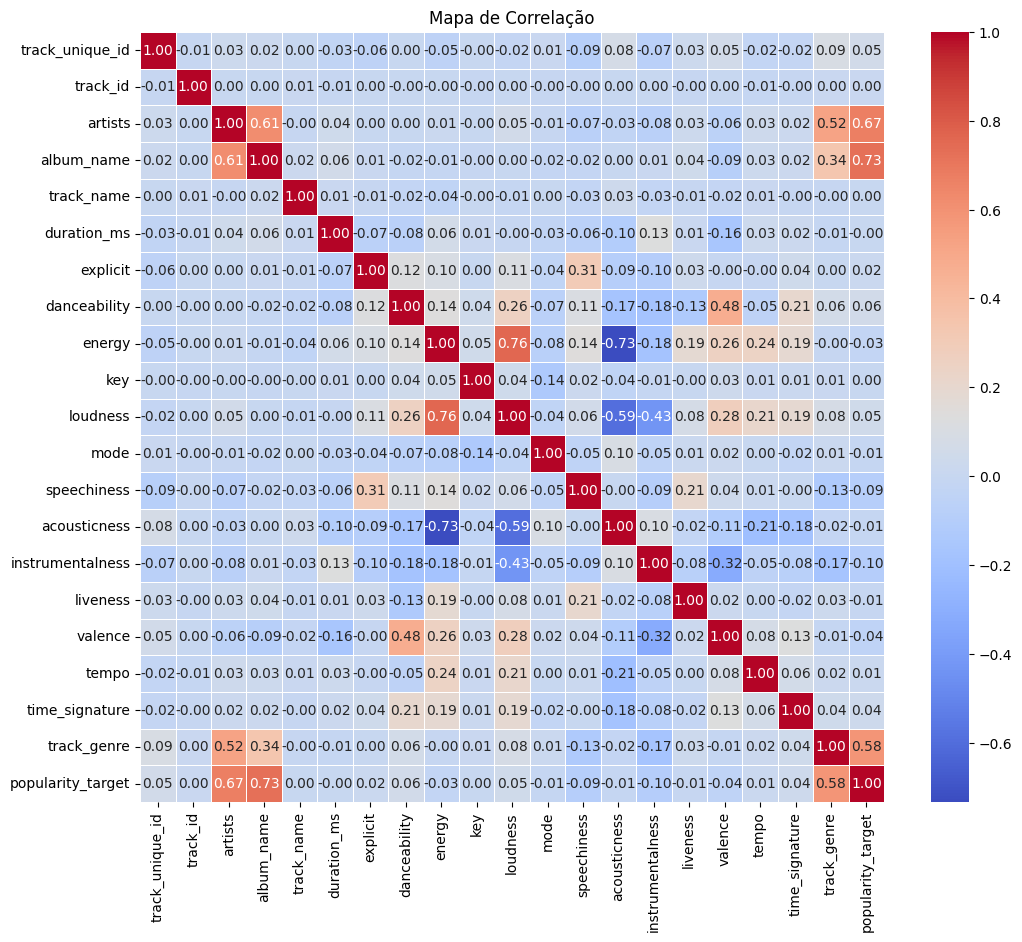

In [242]:
corr_matrix = df_treino.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Correlação')
plt.show()

Analisando os gráficos anteriores e o mapa de correlação, podemos levantar três hipóteses:

1. **Influência do gênero musical na popularidade**: O gênero da música parece influenciar sua popularidade. Por exemplo, no gráfico "Porcentagem de Popularidade por Gênero", observamos que 100% das músicas de forró e sertanejo são populares, enquanto 0% das músicas de "iranian" e "romance" alcançam popularidade.

2. **Relação entre loudness e popularidade**: Comparando os gêneros mais populares com os menos populares, percebemos que a coluna "loudness" (intensidade sonora) tem uma forte relação com a popularidade. No gráfico "Comparação de Médias para a Coluna: Loudness", gêneros como "iranian" e "romance" têm valores de loudness muito baixos em comparação com forró e sertanejo. Isso sugere que músicas com loudness muito baixo tendem a ser menos populares.

3. **Dançabilidade e energia associadas à popularidade**: Músicas mais dançantes e enérgicas tendem a ser mais populares. Isso é visível nos gráficos "Comparação de Médias para a Coluna: Energy" e "Comparação de Médias para a Coluna: Danceability", que mostram uma correlação positiva entre essas características e a popularidade.

**Observação**: As variáveis "artists" e "album_name" apresentam alta correlação com a popularidade, mas isso ocorre porque foram transformadas em colunas numéricas através de target encoding.

### 4. Limpeza e Tratamento de Valores Nulos (até 1,0 pt)
#### 4.1. Valores nulos

In [243]:
print("Valores nulos no dataframe de treino:")
print(df_treino.isnull().sum())

Valores nulos no dataframe de treino:
track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64


Não existe nenhum valor nulo no dataframe de treino, então não precisa lidar com eles.

#### 4.2. outliers

In [244]:
def tratamento_outliers(df, column):
    mean = df[column].mean()
    std_dev = df[column].std()
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    
    inlier_values = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column]
    
    max_inlier = inlier_values.max()
    min_inlier = inlier_values.min()
    
    df.loc[df[column] > upper_bound, column] = max_inlier
    df.loc[df[column] < lower_bound, column] = min_inlier
    
    return df


In [245]:
numeric_columns = df_treino.select_dtypes(include=['int', 'float']).columns

for column in numeric_columns:
    df_treino = tratamento_outliers(df_treino, column)

print(df_treino.shape)

(79800, 21)


#### 4.3. dados duplicados

In [246]:
df_treino.duplicated().sum()

np.int64(0)

### 5. Seleção de Features (até 1,0 pt):

De acordo com a exploração de dados e as hipóteses levantadas, as features que parecem ser menos relevantes para a popularidade são:

- **track_id** e **track_unique_id**: São apenas identificadores únicos, sem relação direta com a popularidade.
- **track_name**: O nome da música não apresenta um impacto direto no sucesso da faixa (embora possam haver exceções).
- **album_name**: Assim como o nome da música, o nome do álbum não demonstra um impacto direto no sucesso da faixa (embora possam haver exceções).
- **mode**: Em todos os gráficos analisados, não foi identificada nenhuma correlação entre essa feature e a popularidade.
- **key**: Da mesma forma, não foi observada uma relação significativa entre essa feature e a popularidade.
- **time_signature**: Os gráficos não indicaram uma correlação alta entre essa feature e a popularidade da música.

Dessa forma, as features que permanecem relevantes são:

- **artists**
- **duration_ms**
- **explicit**
- **danceability**
- **energy**
- **loudness**
- **speechiness**
- **acousticness**
- **instrumentalness**
- **liveness**
- **valence**
- **tempo**
- **track_genre**

In [247]:
df_treino = df_treino.drop(columns=['track_id', 'track_unique_id', 'album_name', 'track_name', 'mode', 'key', 'time_signature'])

In [248]:
df = df_teste.copy()
df_teste = df_teste.drop(columns=['track_id', 'track_unique_id', 'album_name', 'track_name', 'mode', 'key', 'time_signature'])

In [209]:
df_treino.head()

,artists,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre,popularity_target
0,0.424372,211533,0,0.305,0.8490,-10.795,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,0.197917,0
1,0.383365,196000,0,0.287,0.1900,-12.030,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,0.177465,0
2,0.405403,216506,0,0.583,0.5090,-9.661,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,0.095745,1
3,0.424372,218346,0,0.163,0.0368,-23.149,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,0.108883,0
4,0.059855,173160,0,0.647,0.9210,-7.294,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,0.641834,0


In [210]:
df_teste.head()

,artists,duration_ms,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,0.890798,440247,0,0.369,0.598,-6.984,0.0304,0.00511,0.000000,0.176,0.0466,148.014,0.780521
1,0.336600,93933,0,0.171,0.997,-3.586,0.1180,0.00521,0.801000,0.420,0.0294,122.223,0.015015
2,0.412490,213578,0,0.173,0.803,-10.071,0.1440,0.61300,0.001910,0.195,0.0887,75.564,0.000000
3,0.145320,151387,0,0.683,0.511,-5.598,0.0279,0.40600,0.000197,0.111,0.5980,109.991,0.274566
4,0.058555,236293,0,0.555,0.941,-3.294,0.0481,0.48400,0.000000,0.266,0.8130,92.487,0.098571


### 6. Construção e Avaliação do Modelo (até 2,0 pts):

Avaliando RandomForest...
RandomForest - Acurácia: 0.9299498746867167
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8247
           1       0.94      0.92      0.93      7713

    accuracy                           0.93     15960
   macro avg       0.93      0.93      0.93     15960
weighted avg       0.93      0.93      0.93     15960



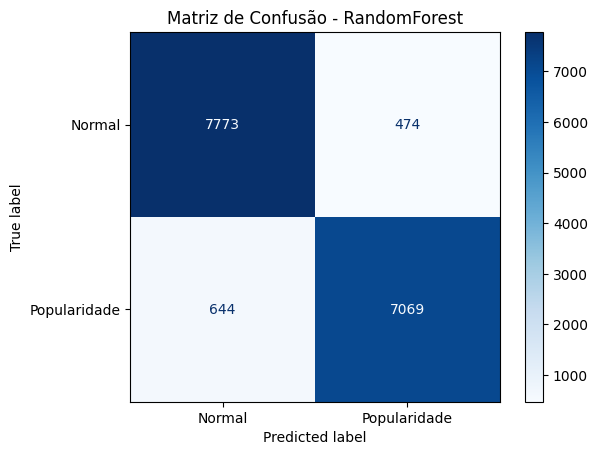

Avaliando GradientBoosting...
GradientBoosting - Acurácia: 0.9239348370927318
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8247
           1       0.93      0.91      0.92      7713

    accuracy                           0.92     15960
   macro avg       0.92      0.92      0.92     15960
weighted avg       0.92      0.92      0.92     15960



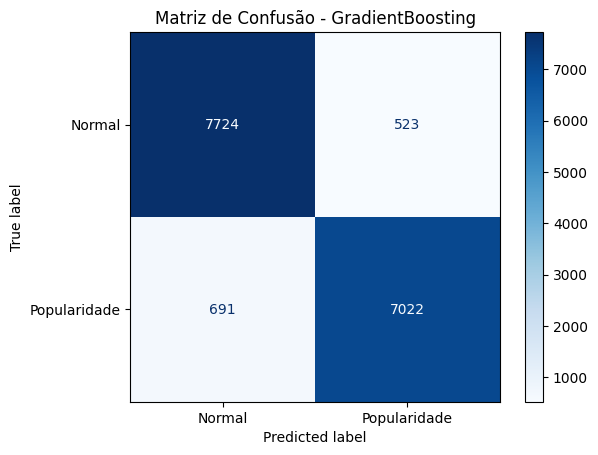

Avaliando LogisticRegression...
LogisticRegression - Acurácia: 0.9162280701754386
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      8247
           1       0.91      0.91      0.91      7713

    accuracy                           0.92     15960
   macro avg       0.92      0.92      0.92     15960
weighted avg       0.92      0.92      0.92     15960



c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


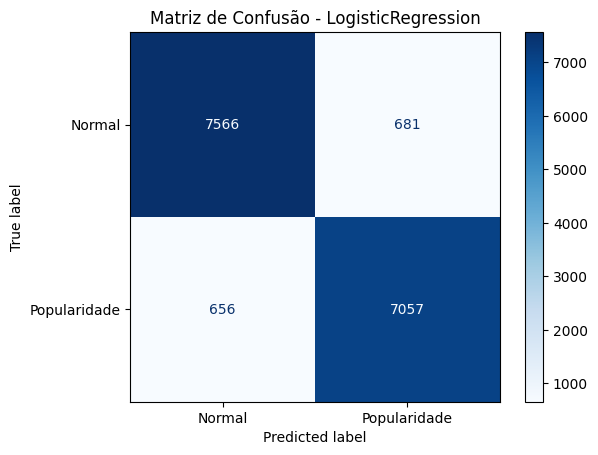

Avaliando KNeighbors...
KNeighbors - Acurácia: 0.5983709273182958
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61      8247
           1       0.58      0.58      0.58      7713

    accuracy                           0.60     15960
   macro avg       0.60      0.60      0.60     15960
weighted avg       0.60      0.60      0.60     15960



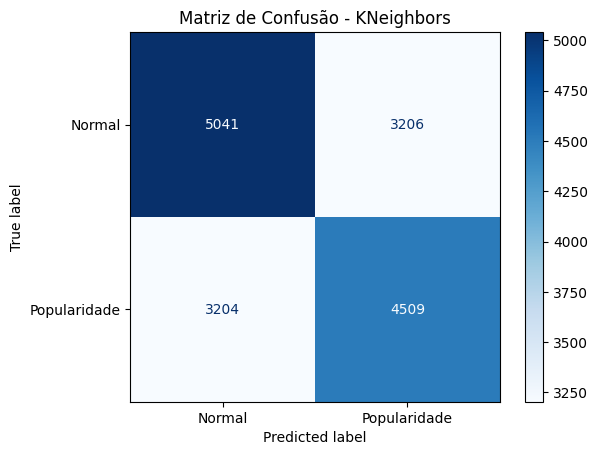

In [212]:
X_train = df_treino.drop('popularity_target', axis=1)
y_train = df_treino['popularity_target']

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),
    'KNeighbors': KNeighborsClassifier()
}

model_performance = {}

for model_name, model in models.items():
    print(f"Avaliando {model_name}...")

    model.fit(X_train_split, y_train_split)
    
    y_pred = model.predict(X_val_split)
    
    accuracy = accuracy_score(y_val_split, y_pred)
    model_performance[model_name] = accuracy
    
    print(f"{model_name} - Acurácia: {accuracy}")
    print(f"Relatório de Classificação:\n{classification_report(y_val_split, y_pred)}")
    
    cm = confusion_matrix(y_val_split, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Popularidade'])
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()



Agora que já fizemos a comparação dos modelos, vamos pegar o melhor modelo, no caso o random forest.

### 7. Finetuning de Hiperparâmetros (até 1,0 pt):

Melhor modelo: RandomForest com acurácia de 0.9299498746867167
Tuning RandomForest...

RandomForest - Melhores parâmetros: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
Acurácia após tuning: 0.9303258145363409
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      8247
           1       0.94      0.92      0.93      7713

    accuracy                           0.93     15960
   macro avg       0.93      0.93      0.93     15960
weighted avg       0.93      0.93      0.93     15960



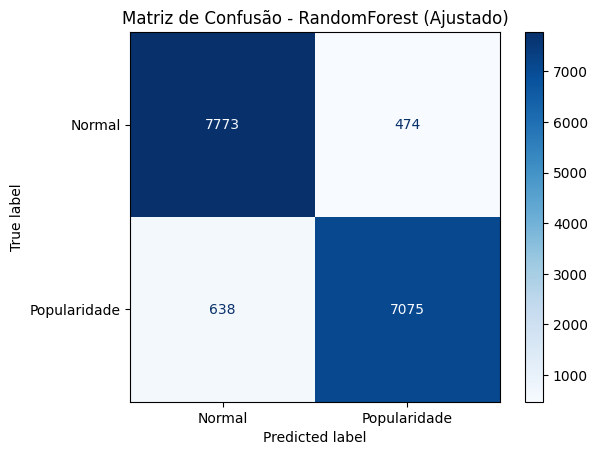

In [213]:
best_model_name = max(model_performance, key=model_performance.get)
print(f"Melhor modelo: {best_model_name} com acurácia de {model_performance[best_model_name]}")

param_distributions = {
    'RandomForest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'GradientBoosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LogisticRegression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
}

print(f"Tuning {best_model_name}...")

grid_search = GridSearchCV(models[best_model_name], param_distributions[best_model_name], cv=5)
grid_search.fit(X_train_split, y_train_split)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_val_split)

print(f"\n{best_model_name} - Melhores parâmetros: {grid_search.best_params_}")
print(f"Acurácia após tuning: {accuracy_score(y_val_split, y_pred)}")
print(f"Relatório de Classificação:\n{classification_report(y_val_split, y_pred)}")

cm = confusion_matrix(y_val_split, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Popularidade'])
disp.plot(cmap='Blues')
plt.title(f'Matriz de Confusão - {best_model_name} (Ajustado)')
plt.show()


análise da importância de cada feature.

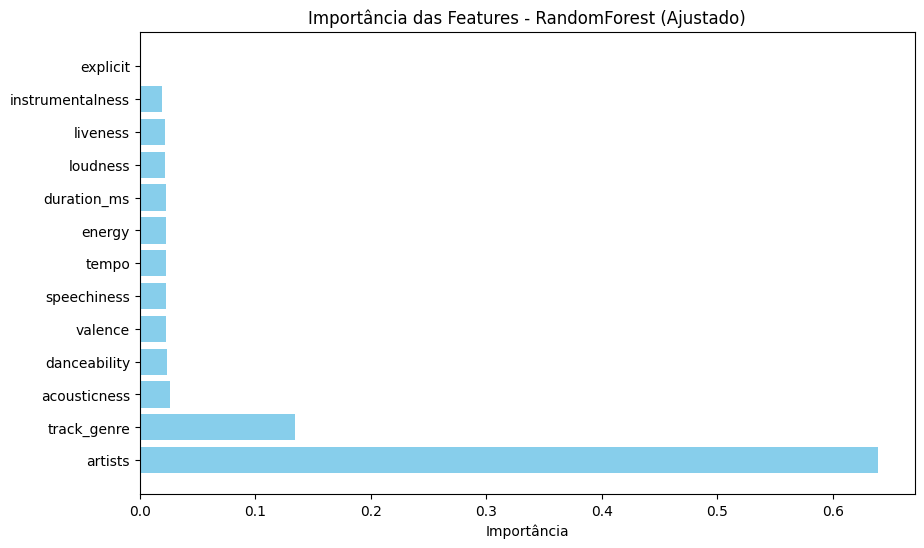

In [214]:
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
elif hasattr(best_model, 'coef_'):
    importances = np.abs(best_model.coef_[0])

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importância')
plt.title(f'Importância das Features - {best_model_name} (Ajustado)')
plt.show()

Por fim, fazendo a criação do dataframe para submissão.

In [249]:
y_pred = best_model.predict(df_teste)

In [252]:
subimission = pd.DataFrame({'track_unique_id': df['track_unique_id'], 'popularity_target': y_pred})

subimission.to_csv('submission.csv', index=False)